# Parte 1. Análisis de sentimiento

## Apartado a)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


file = open("./Datos/yelp_labelled.txt")
dic = {'data':[], 'target':[]}

corpus = file.readlines() 

for i in range (len(corpus)): 
    dic.get('data').append(corpus[i].split("\t")[0]) #agrega solo las frase
    #[0] ya que divide en una lista de dos elementos y queremos coger donde esta la frase 
    #[1] esta el numero 
    dic.get('target').append(int(corpus[i].split("\t")[1].split("\n")[0]))
    #cogemos el numero, al hacer una nueva separacion nos devuelve una lista cons dos elementos 
    #el numero esta en la pos 0 

X_train, x_test, y_train, y_test = train_test_split(dic.get('data'), dic.get('target'), test_size = 0.25)


In [244]:
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt

In [333]:
clasificadoresNB = [] #para guardar los resultados

In [334]:
clasificadoresAD = []

In [335]:
df_NB = pd.DataFrame({'Nombre': [], 'Exactitud': [], 'Recall': [], 'Especificidad': []})

In [336]:
df_AD = pd.DataFrame({'Nombre': [], 'Exactitud': [], 'Recall': [], 'Especificidad': []})

In [337]:
reportNB = []


In [338]:
reportAD = []

### Bolsa de palabras binaria con monograma

In [339]:
#PRIMERO: 
#Obtenemos la frecuencia de palabras, mediante el diccionario estandar
vecBM = CountVectorizer(stop_words = "english", binary = True, ngram_range = (1,1))

train_vecBM = vecBM.fit_transform(X_train).toarray() # SOLO para conjunto de entrenamiento 

#### Clasificador NaiveBayes

In [340]:
from sklearn.naive_bayes import BernoulliNB
# Util para clasificar documentos cortos

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report 

In [341]:
algoritmo = BernoulliNB()

#Entrenamos al modelo 
algoritmo.fit(train_vecBM, y_train)

#Realizo una prediccion 

#Importante: transform SOLO para conjunto de test 
y_pred = algoritmo.predict(vecBM.transform(x_test))

matriz = confusion_matrix(y_test, y_pred)

precNB_bin_mon = metrics.accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

reportNB.append((matriz, report, "NB binario con monograma"))

print("Accuracy:", precNB_bin_mon)
clasificadoresNB.append(("NB binario con monograma:",precNB_bin_mon, metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),algoritmo))

print("\n")
print("Matriz de confusion: ")
print(matriz)


Accuracy: 0.78


Matriz de confusion: 
[[ 85  23]
 [ 32 110]]


La diagonal compuesta por [95, 105] corresponde con __verdaderos positivos__ y __verdaderos negativos__, es decir, hay 200 datos predichos correctamente. 
Mientras que la otra diagonal formada por [10,40], corresponden con __falsos positivos__ y __falsos negativos__ y por lo tanto hay 50 datos que no se han predecido de forma incorrecta

#### Árbol de decisión

In [342]:
from sklearn import tree

In [343]:
cad = tree.DecisionTreeClassifier()
cad = cad.fit(train_vecBM,y_train)

y_pred = cad.predict(vecBM.transform(x_test))

precAD_bin_mon = metrics.accuracy_score(y_test, y_pred)

matriz = confusion_matrix(y_test, y_pred)

report = classification_report(y_test, y_pred)

reportAD.append((matriz, report, "AD binario con monograma"))
                       
print("Accuracy:", precAD_bin_mon)
clasificadoresAD.append(("AD binario con monograma:",precAD_bin_mon,metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),cad))

print("\n")
print("Matriz de confusion: ")
print(matriz)


Accuracy: 0.748


Matriz de confusion: 
[[95 13]
 [50 92]]


### Bolsa de palabras binaria con bigrama

In [344]:
vecBB = CountVectorizer(stop_words = "english", binary = True, ngram_range = (1,2))
train_vecBBarr = vecBB.fit_transform(X_train).toarray()

#### Clasificador NaiveBayes

In [345]:
algoritmo = BernoulliNB()

#Entrenamos al modelo 
algoritmo.fit(train_vecBBarr, y_train)

#Realizo una prediccion 

#Importante: transform SOLO para conjunto de test 
y_pred = algoritmo.predict(vecBB.transform(x_test))

matriz = confusion_matrix(y_test, y_pred)

precNB_bin_bin = metrics.accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

reportNB.append((matriz, report, "NB binario con bigrama"))

print("Accuracy:",precNB_bin_bin)
clasificadoresNB.append(("NB binario con bigrama:",precNB_bin_bin,metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred), algoritmo))

print("\n")
print("Matriz de confusion: ")
print(matriz)



Accuracy: 0.788


Matriz de confusion: 
[[ 94  14]
 [ 39 103]]


En este caso usando una bolsa de palabras __binaria con bigrama__ se obtiene un precisión del __0,792__. Con 198 datos predichos de forma correcta y 52 incorrectos. 

#### Árbol de decisión 

In [346]:
cad = tree.DecisionTreeClassifier()
cad = cad.fit(train_vecBBarr,y_train)

y_pred = cad.predict(vecBB.transform(x_test))

matriz = confusion_matrix(y_test, y_pred)

precAD_bin_bin = metrics.accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

reportAD.append((matriz, report, "AD binario con bigrama"))

                       
print("Accuracy:",precAD_bin_bin)
clasificadoresAD.append(("AD binario con bigrama:",precAD_bin_bin,metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred), cad))
print("\n")
print("Matriz de confusion: ")
print(matriz)


Accuracy: 0.732


Matriz de confusion: 
[[97 11]
 [56 86]]


### Bolsa de palabras TF/IDF con monograma

In [347]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#### Clasificador NaiveBayes

In [348]:
vec = CountVectorizer(stop_words = "english", binary = False, ngram_range = (1,1))

train_vec_data = vec.fit_transform(X_train)

tfidfer = TfidfTransformer()

train_vecIDF = tfidfer.fit_transform(train_vec_data) # obtenemos el IDF 



In [349]:
test_vec_data = vec.transform(x_test)

tes_vec_IDF = tfidfer.transform(test_vec_data)

In [350]:
algoritmo = BernoulliNB()

#Entrenamos al modelo 
algoritmo.fit(train_vecIDF, y_train)

#Realizo una prediccion 

#Importante: transform SOLO para conjunto de test 
y_pred = algoritmo.predict(tes_vec_IDF)

matriz = confusion_matrix(y_test, y_pred)

report = classification_report(y_test, y_pred)

reportNB.append((matriz, report, "NB TFIDF con monograma"))

precNB_IDF_mon = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:",precNB_IDF_mon)
clasificadoresNB.append(("NB TFIDF con monograma:",precNB_IDF_mon,metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred) ,algoritmo))

print("\n")
print("Matriz de confusion: ")
print(matriz)


Accuracy: 0.78


Matriz de confusion: 
[[ 85  23]
 [ 32 110]]


#### Árbol de decisión 

In [351]:
cad = tree.DecisionTreeClassifier()
cad = cad.fit(train_vecIDF,y_train)

y_pred = cad.predict(tes_vec_IDF)

matriz = confusion_matrix(y_test, y_pred)

precAD_IDF_mon = metrics.accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_result)

reportAD.append((matriz, report, "AD TFIDF con monograma"))
                       
print("Accuracy:",precAD_IDF_mon)
clasificadoresAD.append(("AD TFIDF con monograma:",precAD_IDF_mon,metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred) , cad))

print("\n")
print("Matriz de confusion: ")
print(matriz)

Accuracy: 0.74


Matriz de confusion: 
[[ 83  25]
 [ 40 102]]


### Bolsa de palabras TF/IDF con bigrama

#### Clasificador NaiveBayes

In [352]:
vecBi = CountVectorizer(stop_words = "english", binary = False, ngram_range = (1,2))

train_vec_dataBi = vecBi.fit_transform(X_train)

tfidfer = TfidfTransformer()

train_vecIDF_Bi = tfidfer.fit_transform(train_vec_dataBi)



In [353]:
test_vec_data_Bi = vecBi.transform(x_test)

tes_vec_IDF_Bi = tfidfer.transform(test_vec_data_Bi)

In [354]:
algoritmo = BernoulliNB()

#Entrenamos al modelo 
algoritmo.fit(train_vecIDF_Bi, y_train)

#Realizo una prediccion 

#Importante: transform SOLO para conjunto de test 
y_pred = algoritmo.predict(tes_vec_IDF_Bi)

matriz = confusion_matrix(y_test, y_pred)

report = classification_report(y_test, y_pred)

reportNB.append((matriz, report, "NB TFIDF con bigrama"))

precNB_IDF_bin = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:",precNB_IDF_bin)
clasificadoresNB.append(("NB TFIDF con bigrama:",precNB_IDF_bin,metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred) ,algoritmo))

print("\n")
print("Matriz de confusion: ")
print(matriz)


Accuracy: 0.788


Matriz de confusion: 
[[ 94  14]
 [ 39 103]]


#### Árbol de decisión 

In [355]:
cad = tree.DecisionTreeClassifier()
cad = cad.fit(train_vecIDF_Bi,y_train)

y_pred = cad.predict(tes_vec_IDF_Bi)

matriz = confusion_matrix(y_test, y_pred)

precAD_IDF_bin = metrics.accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

reportAD.append((matriz, report, "AD TFIDF con bigrama"))

                       
print("Accuracy:",precAD_IDF_bin)
clasificadoresAD.append(("AD TFIDF con bigrama:",precAD_IDF_bin,metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred) ,cad))

print("\n")
print("Matriz de confusion: ")
print(matriz)


Accuracy: 0.724


Matriz de confusion: 
[[84 24]
 [45 97]]


## RESULTADOS

In [356]:
for i in range (len(clasificadoresNB)): 
    #print(clasificadoresNB[i][0], clasificadoresNB[i][1])
    df_NB = df_NB.append({"Nombre":clasificadoresNB[i][0] ,"Exactitud":clasificadoresNB[i][1], "Recall": clasificadoresNB[i][3], "Especificidad": clasificadoresNB[i][2]}, ignore_index=True)

#print("-------------------------------")

for j in range (len(clasificadoresAD)): 
   #print(clasificadoresAD[j][0], clasificadoresAD[j][1])
    df_AD = df_AD.append({"Nombre":clasificadoresAD[j][0] ,"Exactitud":clasificadoresAD[j][1], "Recall": clasificadoresAD[i][3], "Especificidad": clasificadoresAD[i][2]}, ignore_index=True)


#### __Naïve Bayes__

In [357]:
for i in range (len(reportNB)):
    print("Reporte medias clasificación,", reportNB[i][2])
    print(reportNB[i][1])
    print("Matriz de confusión")
    print(reportNB[i][0])
    print("----------------------------------------------------------")

Reporte medias clasificación, NB binario con monograma
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       108
           1       0.83      0.77      0.80       142

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250

Matriz de confusión
[[ 85  23]
 [ 32 110]]
----------------------------------------------------------
Reporte medias clasificación, NB binario con bigrama
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       108
           1       0.88      0.73      0.80       142

    accuracy                           0.79       250
   macro avg       0.79      0.80      0.79       250
weighted avg       0.81      0.79      0.79       250

Matriz de confusión
[[ 94  14]
 [ 39 103]]
----------------------------------------------------------
Reporte medias clasificación, NB T

#### __Árbol de decisión__

In [358]:
for i in range (len(reportAD)):
    print("Reporte medias clasificación,", reportAD[i][2])
    print(reportAD[i][1])
    print("Matriz de confusión")
    print(reportAD[i][0])
    print("----------------------------------------------------------")

Reporte medias clasificación, AD binario con monograma
              precision    recall  f1-score   support

           0       0.66      0.88      0.75       108
           1       0.88      0.65      0.74       142

    accuracy                           0.75       250
   macro avg       0.77      0.76      0.75       250
weighted avg       0.78      0.75      0.75       250

Matriz de confusión
[[95 13]
 [50 92]]
----------------------------------------------------------
Reporte medias clasificación, AD binario con bigrama
              precision    recall  f1-score   support

           0       0.63      0.90      0.74       108
           1       0.89      0.61      0.72       142

    accuracy                           0.73       250
   macro avg       0.76      0.75      0.73       250
weighted avg       0.78      0.73      0.73       250

Matriz de confusión
[[97 11]
 [56 86]]
----------------------------------------------------------
Reporte medias clasificación, AD TFIDF con

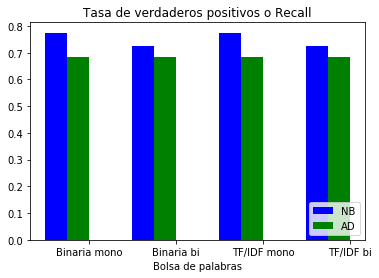

In [361]:
#Recall 
datos = [list(df_NB["Recall"]), list(df_AD["Recall"])]

X = np.arange(4)
plt.bar(X + 0.00, datos[0], color = "b", width = 0.25, label = "NB")
plt.bar(X + 0.25, datos[1], color = "g", width = 0.25, label = "AD")
plt.xticks(X+0.38, ["Binaria mono","Binaria bi","TF/IDF mono" ,"TF/IDF bi"])
plt.title("Tasa de verdaderos positivos o Recall")
plt.xlabel('Bolsa de palabras')
plt.legend(loc="lower right")

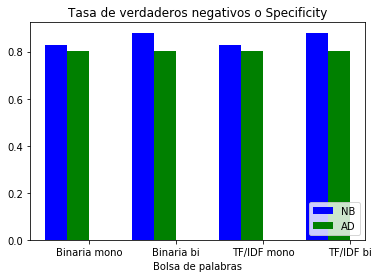

In [362]:
# tasa de verdaderos negativos o specificity
datos = [list(df_NB["Especificidad"]), list(df_AD["Especificidad"])]

X = np.arange(4)
plt.bar(X + 0.00, datos[0], color = "b", width = 0.25, label = "NB")
plt.bar(X + 0.25, datos[1], color = "g", width = 0.25, label = "AD")
plt.xticks(X+0.38, ["Binaria mono","Binaria bi","TF/IDF mono" ,"TF/IDF bi"])
plt.title("Tasa de verdaderos negativos o Specificity")
plt.xlabel('Bolsa de palabras')
plt.legend(loc="lower right")

-----
### Análisis de los resultados
---

### ¿Hay un clasificador que sea superior al otro? ¿por qué crees que sucede?

Si, el clasificador Naïve Bayes proporciona mejores resultados que el Árbol de Decisión debido a que el primero hace uso de probabilidad mediante el Teorema de Bayes proporcionando mejores resultados mientras que el otro se basa en generar un arbol mediante los nodos que son los que oreguntan por los valores de una varaible tomando un camino aparentemente bueno pero que en etapas posteriores no es el mejor. 


### Para cada clasificador, ¿tiene un efecto positivo el añadir “complejidad” a la vectorización? Es decir, añadir bigramas y añadir tf-idf. ¿Por qué crees que sucede este efecto positivo o la falta del mismo?

En lineas geberales presentan valores similares, por lo que no mejoran mucho los resultaods. Puede ser debido a que son corpus pequeños y de de jerga local. 
Podemos observar esa similitud en el digrama de exactitudes de las 4 bolsas de palabras con los dos clasificadores haciendo una comparación. Se puede ver como las barras son de una altura similar en las 4 bolsas de palabras

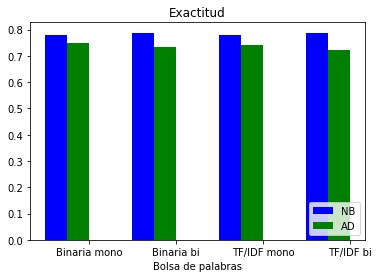

In [363]:
#Exactitud 
exNB= list(df_NB["Exactitud"])
exAD = list(df_AD["Exactitud"])

datos = [exNB, exAD]

X = np.arange(4)
plt.bar(X + 0.00, datos[0], color = "b", width = 0.25, label = "NB")
plt.bar(X + 0.25, datos[1], color = "g", width = 0.25, label = "AD")
plt.xticks(X+0.38, ["Binaria mono","Binaria bi","TF/IDF mono" ,"TF/IDF bi"])
plt.title("Exactitud")
plt.xlabel('Bolsa de palabras')
plt.legend(loc="lower right")

### Para cada clasificador, ¿tiene un comportamiento homogéneo a la hora de clasificar ambas clases? 

### ¿Cuáles son las fortalezas y debilidades de cada uno de los clasificadores? 

### ¿Hay algún clasificador que sea mejor que el otro en todo?  

### ¿Coinciden ambos clasificadores a la hora de clasificar mejor una clase que la otra? 

## Pinta los 8 primeros niveles del árbol de decisión y comenta lo que ves. 

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()

### ¿Qué estructura tiene el árbol? 

### ¿Cómo interpretas los niveles que has pintado? ¿tienen algún sentido con respecto a la tasa de aciertos, o la precisión y exhaustividad del clasificador? 

### ¿Hay nodos impuros? 

##  Por cada clasificador identifica 2 críticas que hayan sido falsas positivas (malas críticas calificadas como buenas) y 2 críticas que han sido falsas negativas (buenas críticas clasificadas como malas). Analiza tanto su texto original, como el vector de palabras resultante (solamente los términos activos).

### ¿Por qué crees que ha fallado el clasificador en cada uno de los casos? 

### ¿Se te ocurre alguna idea sobre cómo mejorar el clasificador de sentimiento?

# Parte 2. Recuperación de la información

In [ ]:
prueba pull

In [ ]:
holaaa